## Load data

In [63]:
import numpy as np
import pandas as pd

In [64]:
md = pd.read_csv("../datasets/model_data.csv") 

In [65]:
md = md.sort_values(by = 'date')

In [66]:
md

,Unnamed: 0,date,sentiment,open,high,low,close,polarity
99,711,2022-01-04,2,396.516663,402.666656,374.350006,383.196655,Decrease
98,710,2022-01-04,0,396.516663,402.666656,374.350006,383.196655,Decrease
97,708,2022-01-04,1,396.516663,402.666656,374.350006,383.196655,Decrease
96,701,2022-01-05,2,382.216675,390.113342,360.336670,362.706665,Decrease
95,700,2022-01-05,1,382.216675,390.113342,360.336670,362.706665,Decrease
...,...,...,...,...,...,...,...,...
4,13,2022-03-03,1,292.923340,295.480011,277.533325,279.763336,Decrease
3,12,2022-03-03,0,292.923340,295.480011,277.533325,279.763336,Decrease
2,4,2022-03-04,2,283.033325,285.216675,275.053345,279.429993,Decrease
1,1,2022-03-04,1,283.033325,285.216675,275.053345,279.429993,Decrease


In [67]:
md = md.drop(['Unnamed: 0','date'],axis=1)

In [68]:
md

,sentiment,open,high,low,close,polarity
99,2,396.516663,402.666656,374.350006,383.196655,Decrease
98,0,396.516663,402.666656,374.350006,383.196655,Decrease
97,1,396.516663,402.666656,374.350006,383.196655,Decrease
96,2,382.216675,390.113342,360.336670,362.706665,Decrease
95,1,382.216675,390.113342,360.336670,362.706665,Decrease
...,...,...,...,...,...,...
4,1,292.923340,295.480011,277.533325,279.763336,Decrease
3,0,292.923340,295.480011,277.533325,279.763336,Decrease
2,2,283.033325,285.216675,275.053345,279.429993,Decrease
1,1,283.033325,285.216675,275.053345,279.429993,Decrease


In [69]:
# construct datasets for analysis
target = 'polarity'
predictors = list(md.columns)
predictors.remove(target)
X = md[predictors]
y = md[target]

In [70]:
split_point = int(len(X)*0.7)
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

In [71]:
X_train

,sentiment,open,high,low,close
99,2,396.516663,402.666656,374.350006,383.196655
98,0,396.516663,402.666656,374.350006,383.196655
97,1,396.516663,402.666656,374.350006,383.196655
96,2,382.216675,390.113342,360.336670,362.706665
95,1,382.216675,390.113342,360.336670,362.706665
...,...,...,...,...,...
35,0,302.790009,314.603333,298.899994,301.516663
34,2,302.790009,314.603333,298.899994,301.516663
32,0,303.209991,305.320007,283.566681,286.666656
31,1,303.209991,305.320007,283.566681,286.666656


In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [73]:
y_pred = knn.predict(X_test)

c:\Users\mukes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [74]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5333333333333333


In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    Decrease       0.64      0.50      0.56        18
    Increase       0.44      0.58      0.50        12

    accuracy                           0.53        30
   macro avg       0.54      0.54      0.53        30
weighted avg       0.56      0.53      0.54        30



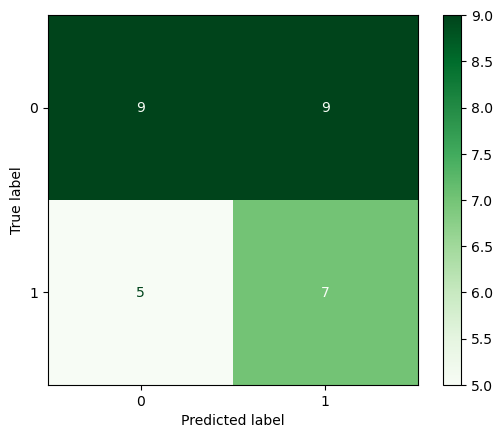

In [76]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
c = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(c)
disp.plot(cmap='Greens')